In [5]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_url = r'D:\b.e\placement\project\cleaned.csv'  # Use raw string for path
data = pd.read_csv(data_url)

In [6]:
data.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [7]:
# Data Exploration

print("Data Overview:")
print(data.head())

print("\nData Description:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())


Data Overview:
   item_id  user_id  rating  timestamp  gender    category    brand  year  \
0        7      131       4      36692  Female  Home Audio  Philips  2000   
1       19      231       5      36891  Female      Camera    Canon  2000   
2       14      233       5      36893  Female      Camera    Kodak  2001   
3       14      257       5      36926  Female      Camera    Kodak  2001   
4       14      269       5      36952  Female      Camera    Kodak  2001   

   month  quantity  unitprice  amount  
0      6         5       6360   31800  
1     12        10       9955   99550  
2      1         9       7639   68751  
3      2         7       5097   35679  
4      3        10       6472   64720  

Data Description:
            item_id       user_id        rating     timestamp          year  \
count  45166.000000  4.516600e+04  45166.000000  45166.000000  45166.000000   
mean    3455.669574  4.846225e+05      4.218594  42077.370743   2014.710136   
std     2485.219357  3.302

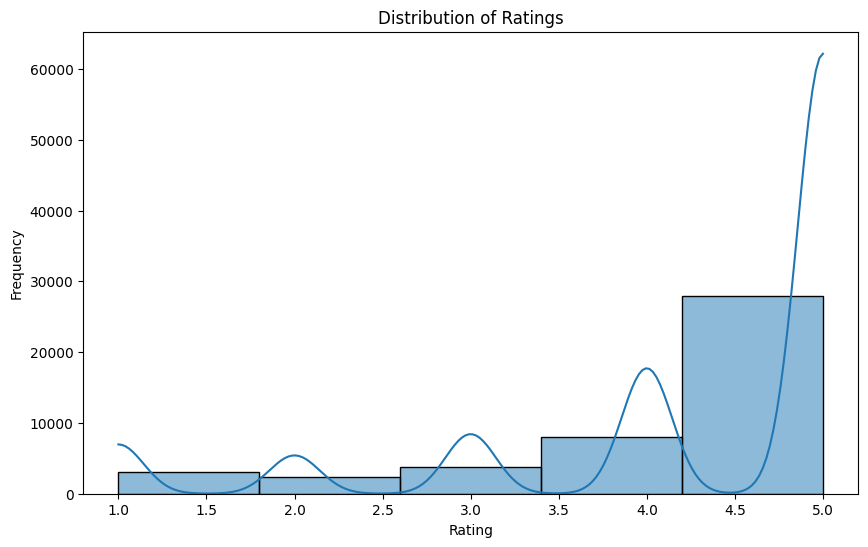

In [8]:
# Data Visualization - Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


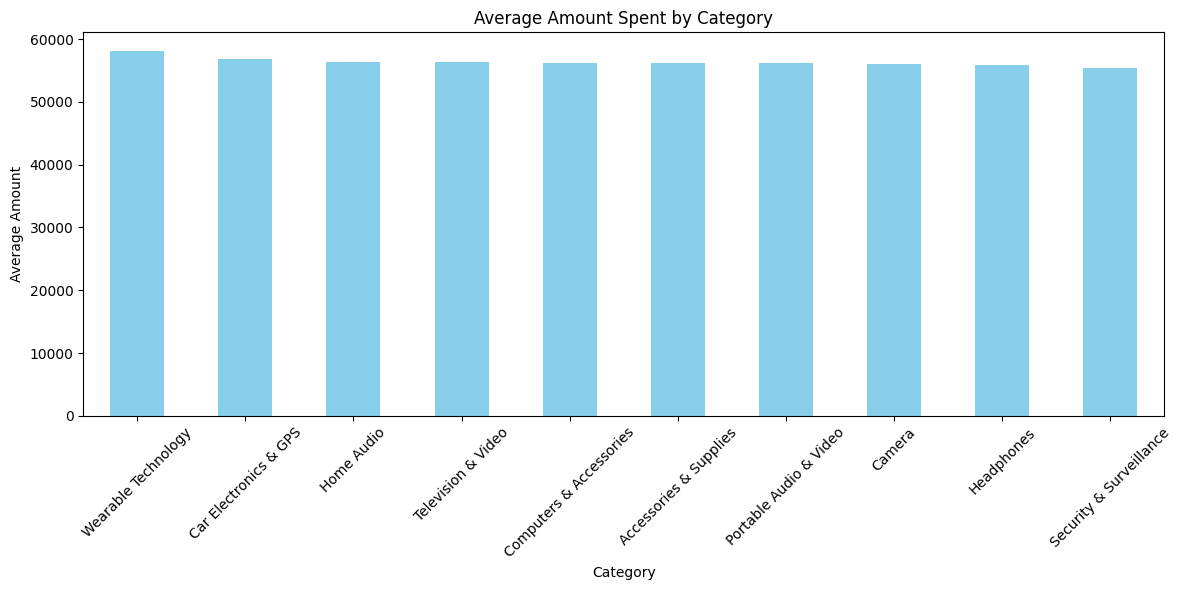

In [9]:
# Average Amount Spent by Category
avg_amount_by_category = data.groupby('category')['amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_amount_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Amount Spent by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


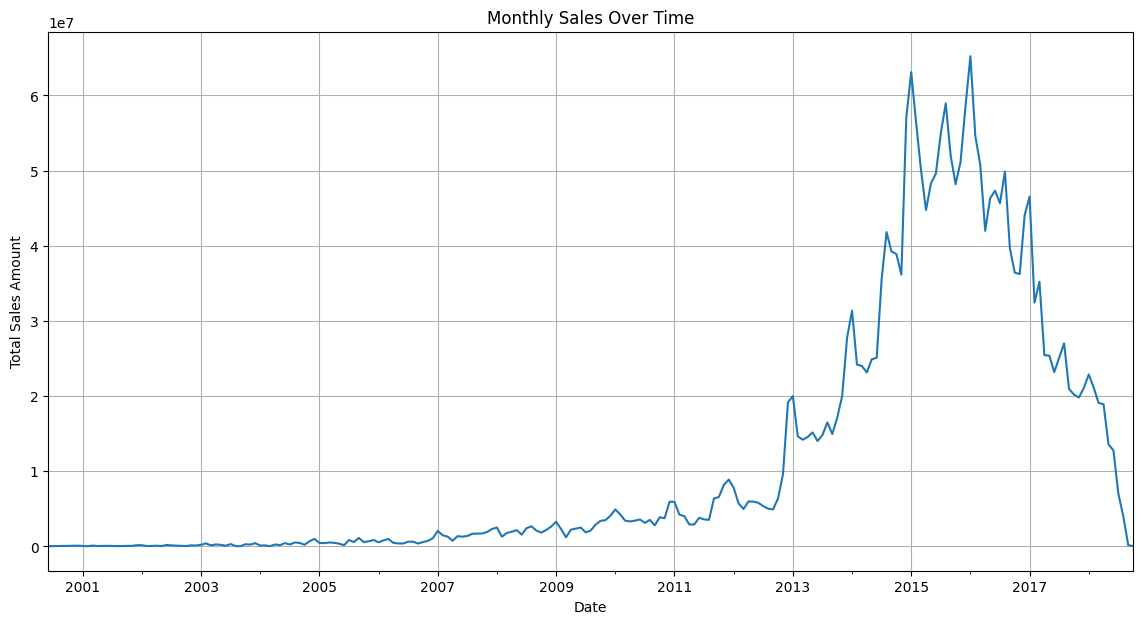

In [10]:
#  Sales Trends Over Time

data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

# Group by month and sum the 'amount'
monthly_sales = data.groupby(data['date'].dt.to_period('M'))['amount'].sum()

# Plotting the results
plt.figure(figsize=(14, 7))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid()
plt.show()


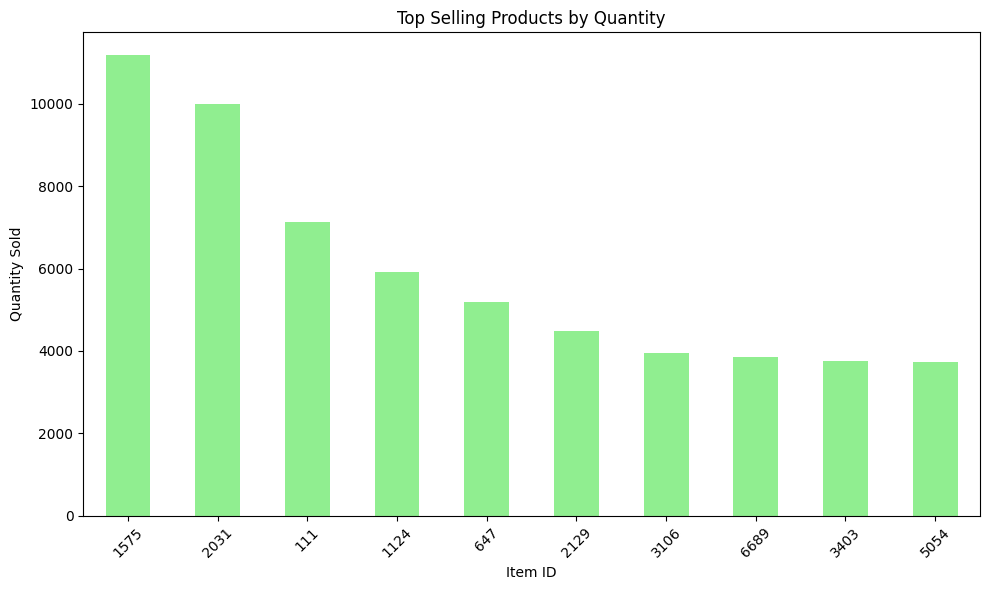

In [11]:
#  Top Selling Products
top_selling_products = data.groupby('item_id')['quantity'].sum().nlargest(10)
top_selling_products.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Top Selling Products by Quantity')
plt.xlabel('Item ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:

data.to_csv('processed_cleaned_data.csv', index=False)


In [14]:
#Visualizations
plt.savefig('monthly_sales.png')


<Figure size 640x480 with 0 Axes>